### A broad class of clustering

In [61]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [69]:
# load iris dataset
raw_iris = load_iris()
iris_data = raw_iris.data
iris = iris_data
iris = pd.DataFrame(raw_iris.data, columns = raw_iris.feature_names)
iris['target'] = raw_iris.target
# format [x1, x2, x3, x4, target]
iris = np.array(
    iris[[
        'sepal length (cm)',
        'sepal width (cm)',
        'petal length (cm)',
        'petal width (cm)',
        'target'
    ]]
)
iris[:, 4] = iris[:, 4].astype(int)
iris


array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

In [62]:
# unique nice clustering dataset
def unique_nice_clustered_data(k=4, dim=2, cluster_size=25, seed=42):
    np.random.seed(seed)
    data = np.zeros((cluster_size * k, dim))
    for k_i in range(1, k+1):
        center = np.array([np.random.uniform(10*k_i, 15*k_i) for i in range(dim)])
        # generate cluster_size points centered around center
        data[(k_i - 1) * cluster_size:k_i * cluster_size, :] = center + np.random.randn(cluster_size, dim)
    return data


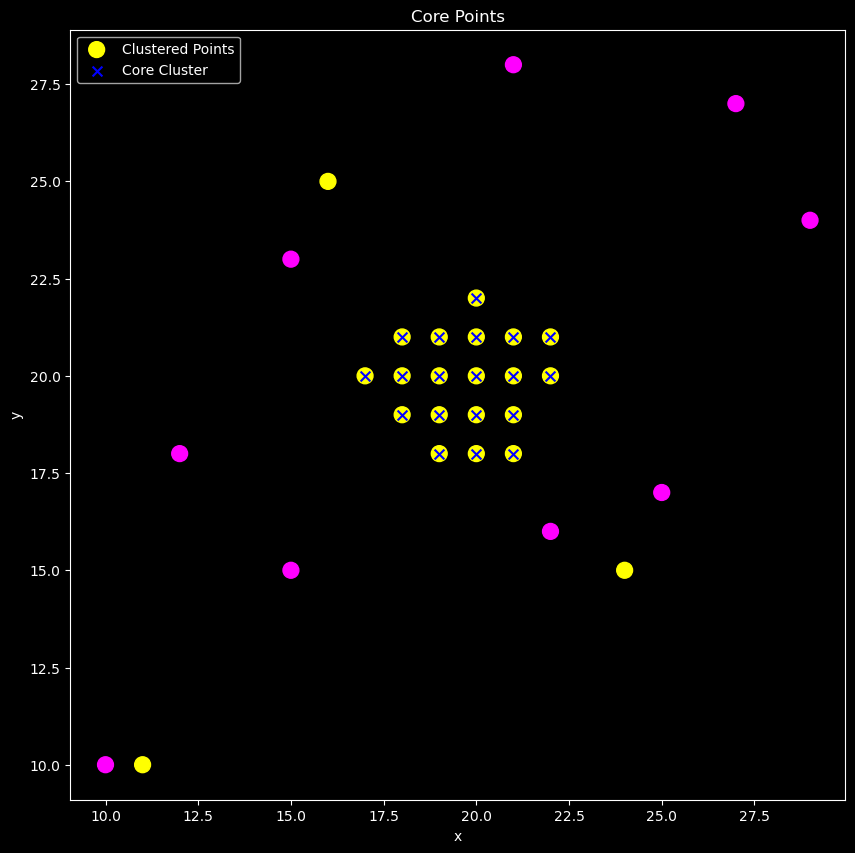

In [63]:
# 1 means in cluster, 0 means not in cluster
core_vis_data = np.array([
    [20, 20, 1],
    [19, 20, 1],
    [20, 21, 1],
    [21, 20, 1],
    [20, 19, 1],
    [19, 19, 1],
    [19, 21, 1],
    [21, 21, 1],
    [21, 19, 1],
    [18, 20, 1],
    [20, 18, 1],
    [22, 20, 1],
    [20, 22, 1],
    [18, 19, 1],
    [19, 18, 1],
    [21, 18, 1],
    [18, 21, 1],
    [22, 21, 1],
    [17, 20, 1],
    [27, 27, 0],
    [29, 24, 0],
    [15, 23, 0],
    [16, 25, 1],
    [24, 15, 1],
    [25, 17, 0],
    [22, 16, 0],
    [10, 10, 0],
    [11, 10, 1],
    [21, 28, 0],
    [15, 15, 0],
    [12, 18, 0]
])

# Core Points (Z)
# if d(x, z) < d(x, y)
# for all x in Cluster, z in Core Cluster and y not in Cluster
Z = np.array([
    [20, 20],
    [19, 20],
    [20, 21],
    [21, 20],
    [20, 19],
    [19, 19],
    [19, 21],
    [21, 21],
    [21, 19],
    [18, 20],
    [20, 18],
    [22, 20],
    [20, 22],
    [18, 19],
    [19, 18],
    [21, 18],
    [18, 21],
    [22, 21],
    [17, 20],
])

# plot data
plt.figure(figsize=(10, 10))
plt.scatter(
    core_vis_data[:, 0],
    core_vis_data[:, 1],
    c=core_vis_data[:, 2],
    cmap='spring',
    s=130
)
plt.scatter(Z[:, 0], Z[:, 1], s=50, c='b', marker='x')
plt.title('Core Points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Clustered Points', 'Core Cluster'], loc='upper left')
plt.show()


# Probabilistic Refinement of Cluster

In [98]:
class DetectRefinement():
    def __init__(self, k, random_state=42):
        self.k = k
        np.random.seed(random_state)

    def refine(self, l, X):
        # X is of the form [x1, x2, ..., xd, c]
        # where c is the cluster number
        self.T = np.array([X[t] for t in range(l)])
        N = len(X)
        if (l < self.k):
            print(f'l = {l} should be >= k = {self.k}')
            return
        for t in range(l, N):
            xt = X[t]
            # with probability l/t
            if (np.random.rand() < l / t):
                # choose a random point from T
                # and replace it with xt
                self.T[np.random.randint(0, l)] = xt
        return self.T


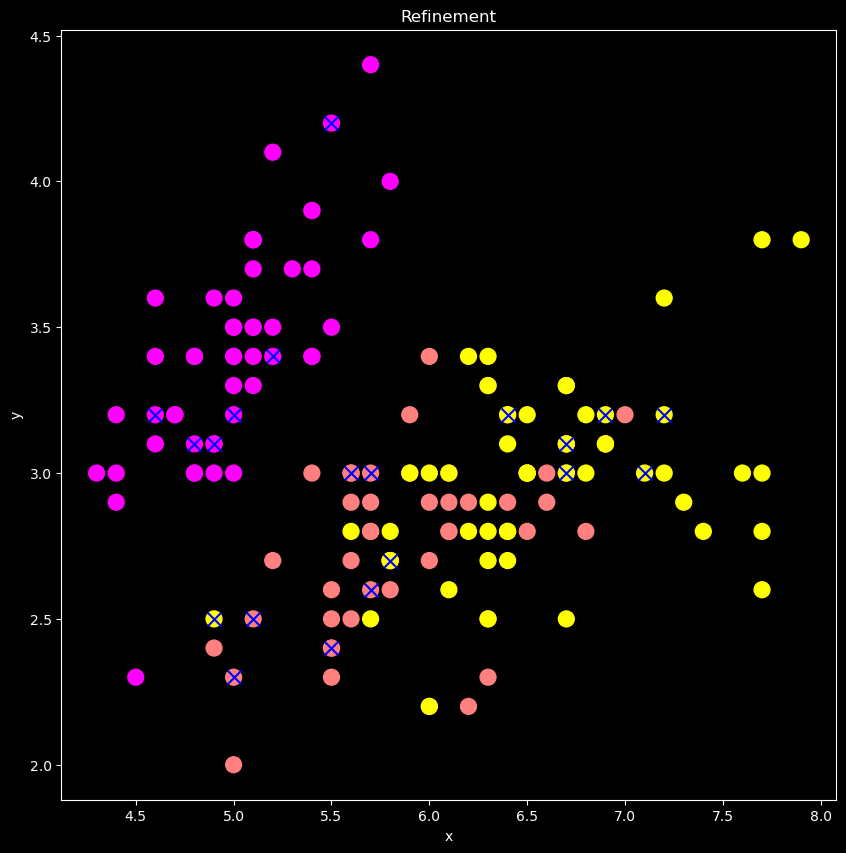

In [99]:
detect_refinement = DetectRefinement(3, random_state=10)
T = detect_refinement.refine(20, iris)

# plot data
plt.figure(figsize=(10, 10))
plt.scatter(
    iris[:, 0],
    iris[:, 1],
    c=iris[:, 4],
    cmap='spring',
    s=130
)
plt.scatter(T[:, 0], T[:, 1], s=100, c='b', marker='x')
plt.title('Refinement')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


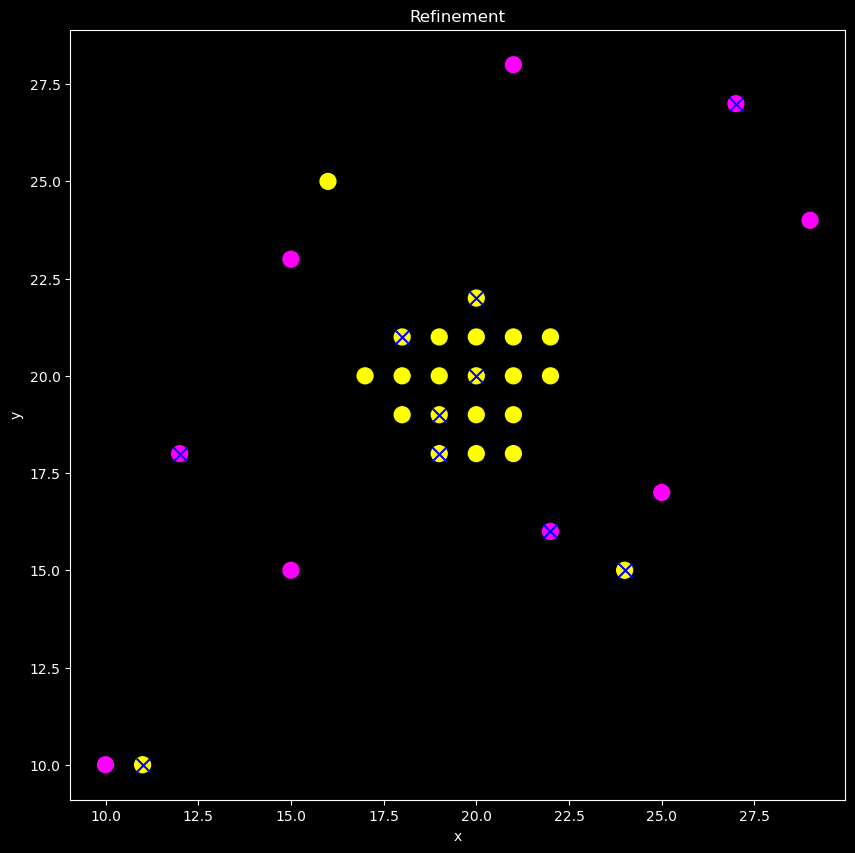

In [100]:
detect_refinement = DetectRefinement(1, random_state=42)
T = detect_refinement.refine(10, core_vis_data)

# plot data
plt.figure(figsize=(10, 10))
plt.scatter(
    core_vis_data[:, 0],
    core_vis_data[:, 1],
    c=core_vis_data[:, 2],
    cmap='spring',
    s=130
)
plt.scatter(T[:, 0], T[:, 1], s=100, c='b', marker='x')
plt.title('Refinement')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
